In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# ***Upload Titanic CSV File***

In [2]:
df = pd.read_csv("/content/train.csv")

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


/tmp/ipython-input-2665356624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2665356624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# ***Some Important Plot***

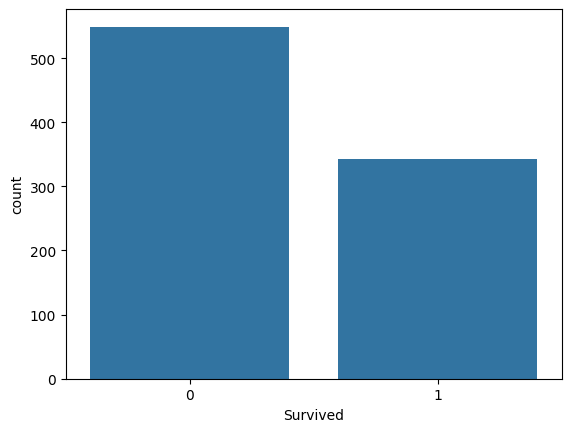

In [6]:
sns.countplot(x="Survived", data=df)
plt.show()


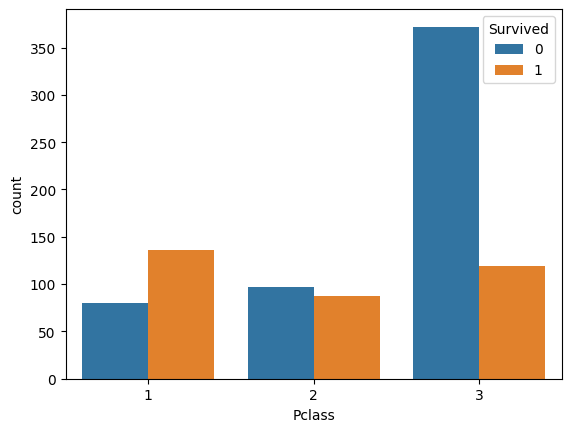

In [7]:

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()


# ***HistoGram Plot***

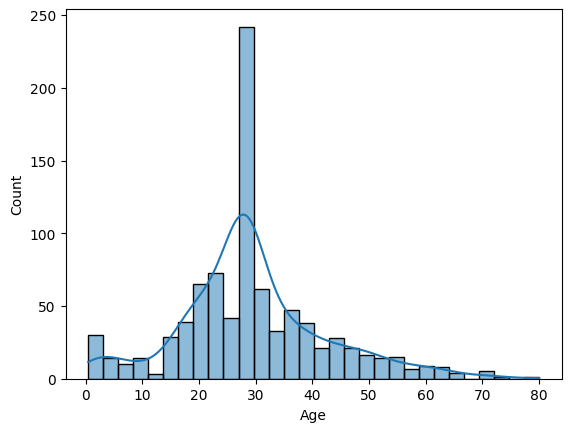

In [8]:
sns.histplot(df["Age"], kde=True)
plt.show()

# ***Box Plot For Outlier Detection***

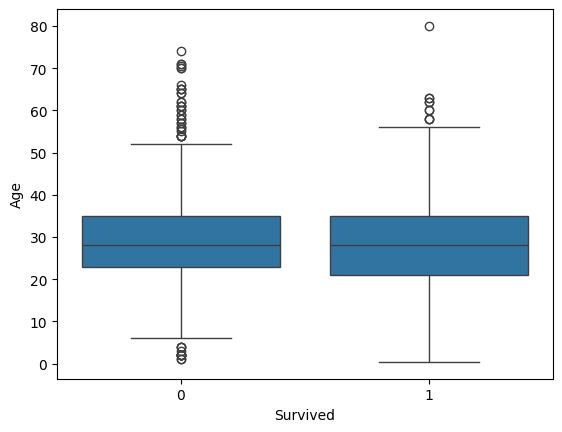

In [9]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

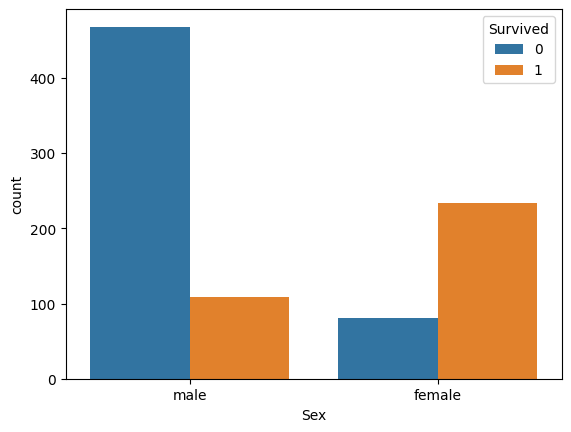

In [10]:

sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()


In [11]:
label_cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [14]:
X = df[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# ***Decision Plot***

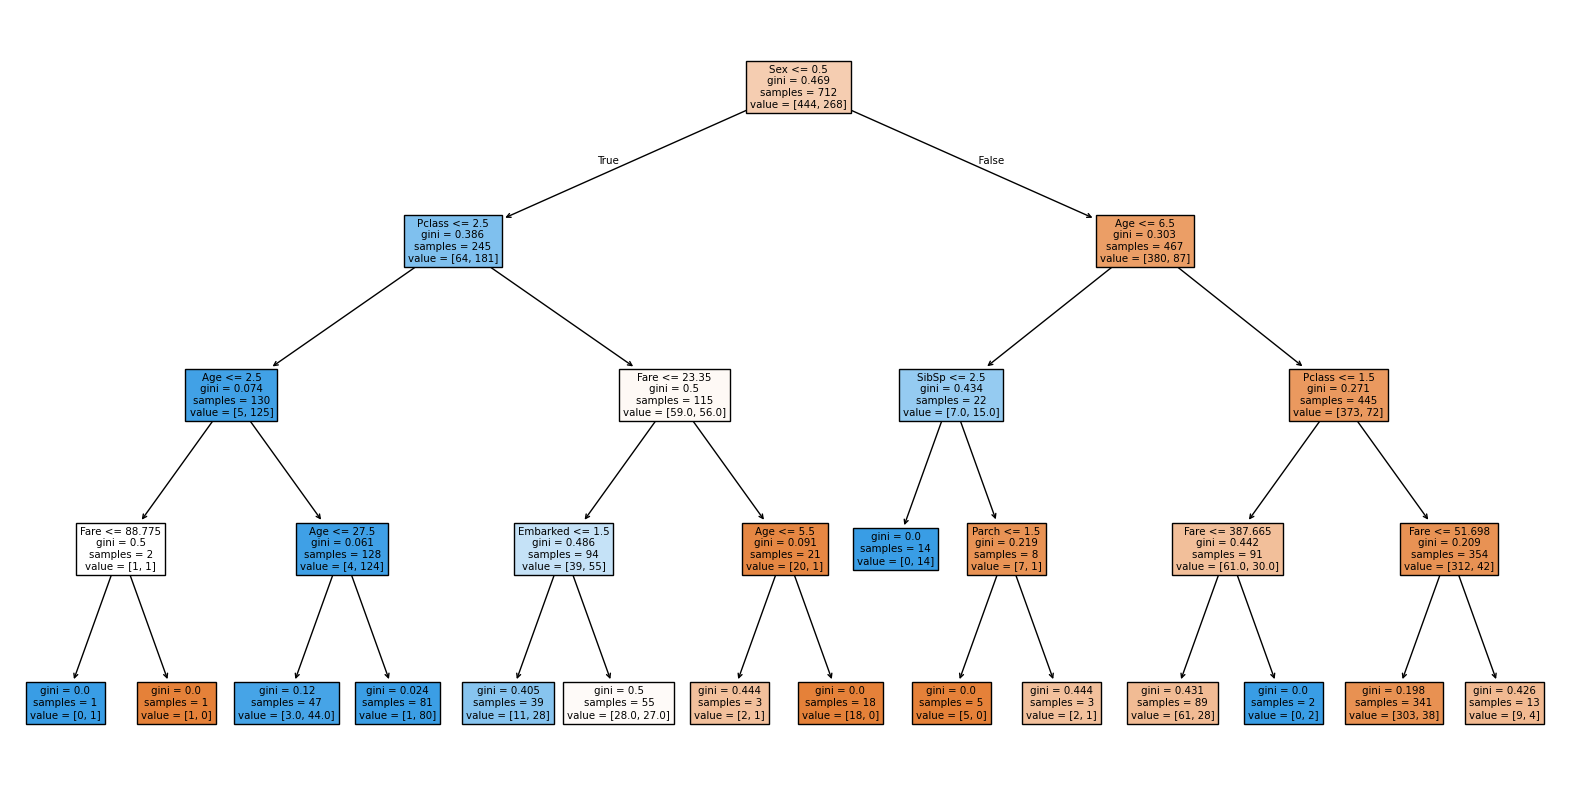

In [16]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

age_range = np.linspace(df["Age"].min(), df["Age"].max(), 200)


In [17]:
baseline = {
    "Pclass": 2,
    "Sex": df["Sex"].mode()[0],
    "Fare": df["Fare"].median(),
    "SibSp": 0,
    "Parch": 0,
    "Embarked": df["Embarked"].mode()[0]
}

age_df = pd.DataFrame([{**baseline, "Age": a} for a in age_range])
age_df = age_df[X.columns]


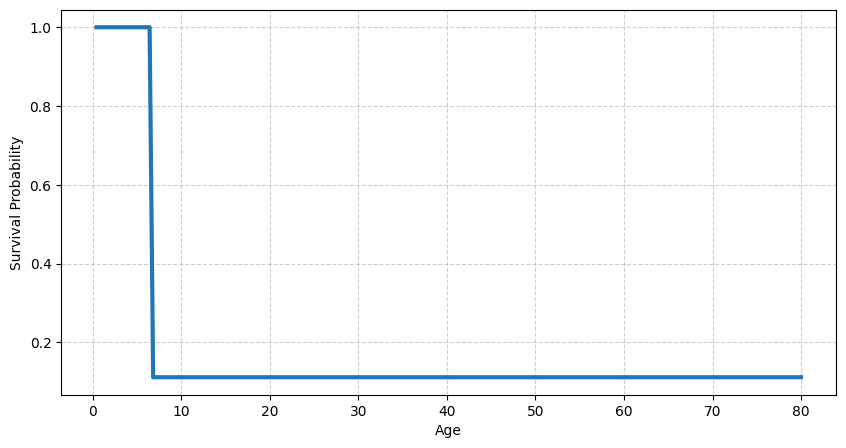

In [19]:
probs = model.predict_proba(age_df)[:, 1]

plt.figure(figsize=(10,5))
plt.plot(age_range, probs, linewidth=3)
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()